<a href="https://colab.research.google.com/github/Francisco2963/Proyecto-I--Parte-3-Core-/blob/V2.0/Proyecto_I_Parte_IV_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto I- Parte IV (Core)

Análisis y Predicción de Ventas en una Tienda de Retail


Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

Instrucciones

Continuar desde la Parte III

Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.

Análisis Descriptivo y Visualización

Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

Generar un Pull Request en GitHub

Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión

# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [4]:
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

Para crear una nueva columna de ventas tenemos dos opciones:

1.- podemos renombrar la columna 'Total Amount' que signica  cantidad total, que a su vez es la multiplicacion de precio unitario por cantidad, lo que daria las ventas

2.- podemos crear una nueva columna 'sales' (ventas) basada en la columna 'Total Amount'

Eligiremos la segunda opcion y lo guardaremos en una nueva variable df-1

In [7]:
df_1 = df['Sales'] = df['Total Amount']
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


Clasifica los datos:

Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [8]:
df_1 = df['Sales'].unique()
df_1

array([ 150, 1000,   30,  500,  100,   50,  600,  200,   75, 1500,  120,
       2000,  900,  300, 1200,   90,   25,   60])

In [9]:
df_1 = df['Sales'].dtype
df_1

dtype('int64')

Para crear la columna 'categoria de ventas' ocupamos el metodo pd.cut que nos sirve para categorizar nuestros datos numericos de la columna sales en intervalos definidos con float('int') cualquier valor superior a 1500 caera en la categoria 'Alta'

In [10]:
bins = [0, 800, 1500, float('inf')]
labels = ['Baja', 'Media', 'Alta']

df_1 = df['categoria_ventas'] = pd.cut(df['Sales'], bins = bins, labels = labels)
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    1000 non-null   int64   
 1   Date              1000 non-null   object  
 2   Customer ID       1000 non-null   object  
 3   Gender            1000 non-null   object  
 4   Age               1000 non-null   int64   
 5   Product Category  1000 non-null   object  
 6   Quantity          1000 non-null   int64   
 7   Price per Unit    1000 non-null   int64   
 8   Total Amount      1000 non-null   int64   
 9   Sales             1000 non-null   int64   
 10  categoria_ventas  1000 non-null   category
dtypes: category(1), int64(6), object(4)
memory usage: 79.4+ KB


Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

Para poder agrupar por categoria como producto y tienda, debemos crear la columna tienda

In [12]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


Crearemos un diccionario que este relacionado con la columna Product Category para poder asignar una tienda a cada fila del DataFrame

In [44]:
df['Tienda'] = df['Product Category']

dicc = {'Clothing': 1, 'Electronics': 2, 'Beauty': 3}
df['Tienda'] = df['Tienda'].map(dicc)

df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje
422,423,2023-03-08,CUST423,Female,27,Clothing,1,25,25,25,Baja,1,0.016069
241,242,2023-05-02,CUST242,Male,21,Clothing,1,25,25,25,Baja,1,0.016069
235,236,2023-04-28,CUST236,Female,54,Clothing,1,25,25,25,Baja,1,0.016069
231,232,2023-02-06,CUST232,Female,43,Beauty,1,25,25,25,Baja,3,0.017420
906,907,2023-01-08,CUST907,Female,45,Electronics,1,25,25,25,Baja,2,0.015933


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 422 to 594
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    1000 non-null   int64   
 1   Date              1000 non-null   object  
 2   Customer ID       1000 non-null   object  
 3   Gender            1000 non-null   object  
 4   Age               1000 non-null   int64   
 5   Product Category  1000 non-null   object  
 6   Quantity          1000 non-null   int64   
 7   Price per Unit    1000 non-null   int64   
 8   Total Amount      1000 non-null   int64   
 9   Sales             1000 non-null   int64   
 10  categoria_ventas  1000 non-null   category
 11  Tienda            1000 non-null   int64   
 12  Porcentaje        1000 non-null   float64 
dtypes: category(1), float64(1), int64(7), object(4)
memory usage: 135.0+ KB


Primero habia creado la columna Tiendas con un for pero todas sus filas me indicaban valores NaN, al corregir el codigo y hacer un diccionario indicando las Tiendas A, B y C y ejecutar el codigo, en el dataFrame se crearon dos columnas, por esa razon se elimina la columna Tiendas creada primero.

In [46]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje
422,423,2023-03-08,CUST423,Female,27,Clothing,1,25,25,25,Baja,1,0.016069
241,242,2023-05-02,CUST242,Male,21,Clothing,1,25,25,25,Baja,1,0.016069
235,236,2023-04-28,CUST236,Female,54,Clothing,1,25,25,25,Baja,1,0.016069
231,232,2023-02-06,CUST232,Female,43,Beauty,1,25,25,25,Baja,3,0.017420
906,907,2023-01-08,CUST907,Female,45,Electronics,1,25,25,25,Baja,2,0.015933


Al comenzar los analisis a las columnas, guardaremos nuestros resultados en un nuevo dataFrame.

Al analizar la columna Tienda podemos ver que la tienda A dedicada a los productos de vestuarios es la que tiene mayor ubicaciones de ventas, seguida de la tienda B dedicada a la electronica y por ultimo la tienda C de didicada a los productos de belleza

In [47]:
df_1 = df['Tienda'].value_counts()
df_1.tail()

,count
Tienda,
1,351
2,342
3,307


In [48]:
df_1 = df.sort_values(by = 'Tienda')
df_1.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje
357,358,2023-05-16,CUST358,Female,32,Beauty,1,300,300,300,Baja,3,0.209037
377,378,2023-06-28,CUST378,Male,50,Beauty,1,300,300,300,Baja,3,0.209037
934,935,2023-09-09,CUST935,Female,34,Beauty,1,50,50,50,Baja,3,0.034840
791,792,2023-07-09,CUST792,Female,20,Beauty,1,50,50,50,Baja,3,0.034840
759,760,2023-03-27,CUST760,Male,27,Beauty,1,500,500,500,Baja,3,0.348396


Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

Al analizar los productos vendidos podemos ver que los productos electronicos es lo que tienen mayor venta, seguido por vestuaio y por ultimo belleza.

In [49]:
df_1 = ventas_por_producto = df.groupby('Product Category')['Sales'].sum()
df_1

,Sales
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


En esta parte podemos ver que el numero de ventas por producto la lidera la tienda A dedicada a los articulos de belleza

In [50]:
df_1 = df.groupby('Tienda')['Sales'].count()
df_1

,Sales
Tienda,
1,351
2,342
3,307


In [51]:
df_grouped = df.groupby(['Product Category','Tienda'])
df['Porcentaje'] = df_grouped['Sales'].transform(lambda x: x / x.sum() * 100)
df_agrupado = df[['Product Category','Tienda','Sales','Porcentaje']]
df_agrupado

,Product Category,Tienda,Sales,Porcentaje
422,Clothing,1,25,0.016069
241,Clothing,1,25,0.016069
235,Clothing,1,25,0.016069
231,Beauty,3,25,0.017420
906,Electronics,2,25,0.015933
...,...,...,...,...
742,Beauty,3,2000,1.393583
560,Clothing,1,2000,1.285512
256,Beauty,3,2000,1.393583
252,Clothing,1,2000,1.285512


In [52]:
df_1 = ventas_minimas_por_tienda = df.groupby('Tienda')['Sales'].min()
df_1

,Sales
Tienda,
1,25
2,25
3,25


In [53]:
df_1 = ventas_maximas_por_tienda = df.groupby('Tienda')['Sales'].max()
df_1

,Sales
Tienda,
1,2000
2,2000
3,2000


La tienda C es el que tiene el promedio mas alto en ventas, con un promedio de 465 productos vendidos.

In [54]:

df_1 = promedio_ventas_por_tienda = df.groupby('Tienda')['Sales'].mean()
df_1

,Sales
Tienda,
1,443.247863
2,458.786550
3,467.475570


La desviacion estandar de las 3 tiendas muestran un vlor alto, lo que indica que las ventas en las 3 tiendas varian mucho de un dia a otro o de un periodo a otro.

In [55]:
# Desviación estándar de las ventas por tienda
df_1 = desviacion_estandar_ventas = df.groupby('Tienda')['Sales'].std()
df_1

,Sales
Tienda,
1,550.695917
2,567.540150
3,563.612788


In [56]:
# Varianza de las ventas por tienda
df_1 = varianza_ventas = df.groupby('Tienda')['Sales'].var()
df_1

,Sales
Tienda,
1,303265.992674
2,322101.822341
3,317659.374401


Análisis Personalizado con apply

Función personalizada:

Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar. Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.

Podemos ver que las venta de la tienda C se encuentran  por debajo del pormedio de la tiendas, a excepcion de la fila 4 que se encuentra 32 unidades por encima del promedio de ventas de esa tienda.


In [57]:
df_grouped = df.groupby('Tienda')['Sales'].mean().reset_index(name='mean_sales')
df_1 = pd.merge(df, df_grouped, on='Tienda')
df_1['deviation'] = df_1.apply(lambda x: x['Sales'] - x['mean_sales'], axis=1)
df_1

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje,mean_sales,deviation
0,423,2023-03-08,CUST423,Female,27,Clothing,1,25,25,25,Baja,1,0.016069,443.247863,-418.247863
1,242,2023-05-02,CUST242,Male,21,Clothing,1,25,25,25,Baja,1,0.016069,443.247863,-418.247863
2,236,2023-04-28,CUST236,Female,54,Clothing,1,25,25,25,Baja,1,0.016069,443.247863,-418.247863
3,764,2023-03-25,CUST764,Female,40,Clothing,1,25,25,25,Baja,1,0.016069,443.247863,-418.247863
4,955,2023-07-14,CUST955,Male,58,Clothing,1,25,25,25,Baja,1,0.016069,443.247863,-418.247863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,946,2023-05-08,CUST946,Male,62,Electronics,4,500,2000,2000,Alta,2,1.274657,458.786550,1541.213450
996,65,2023-12-05,CUST065,Male,51,Electronics,4,500,2000,2000,Alta,2,1.274657,458.786550,1541.213450
997,72,2023-05-23,CUST072,Female,20,Electronics,4,500,2000,2000,Alta,2,1.274657,458.786550,1541.213450
998,927,2023-06-24,CUST927,Male,43,Electronics,4,500,2000,2000,Alta,2,1.274657,458.786550,1541.213450


In [58]:
df_1['deviation'].describe()

,deviation
count,1.000000e+03
mean,2.910383e-14
std,5.599081e+02
min,-4.424756e+02
25%,-3.924756e+02
50%,-3.203617e+02
75%,4.325244e+02
max,1.556752e+03


In [59]:
df_1['mean_sales'].describe()

,mean_sales
count,1000.000000
mean,456.000000
std,10.013133
min,443.247863
25%,443.247863
50%,458.786550
75%,467.475570
max,467.475570


# VISUALIZACION

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df.head(5)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje
422,423,2023-03-08,CUST423,Female,27,Clothing,1,25,25,25,Baja,1,0.016069
241,242,2023-05-02,CUST242,Male,21,Clothing,1,25,25,25,Baja,1,0.016069
235,236,2023-04-28,CUST236,Female,54,Clothing,1,25,25,25,Baja,1,0.016069
231,232,2023-02-06,CUST232,Female,43,Beauty,1,25,25,25,Baja,3,0.017420
906,907,2023-01-08,CUST907,Female,45,Electronics,1,25,25,25,Baja,2,0.015933


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 422 to 594
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    1000 non-null   int64   
 1   Date              1000 non-null   object  
 2   Customer ID       1000 non-null   object  
 3   Gender            1000 non-null   object  
 4   Age               1000 non-null   int64   
 5   Product Category  1000 non-null   object  
 6   Quantity          1000 non-null   int64   
 7   Price per Unit    1000 non-null   int64   
 8   Total Amount      1000 non-null   int64   
 9   Sales             1000 non-null   int64   
 10  categoria_ventas  1000 non-null   category
 11  Tienda            1000 non-null   int64   
 12  Porcentaje        1000 non-null   float64 
dtypes: category(1), float64(1), int64(7), object(4)
memory usage: 135.0+ KB


In [63]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Sales,Tienda,Porcentaje
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,456.000000,1.956000,0.300000
std,288.819436,13.68143,1.132734,189.681356,559.997632,559.997632,0.810383,0.368916
min,1.000000,18.00000,1.000000,25.000000,25.000000,25.000000,1.000000,0.015933
25%,250.750000,29.00000,1.000000,30.000000,60.000000,60.000000,1.000000,0.041807
50%,500.500000,42.00000,3.000000,50.000000,135.000000,135.000000,2.000000,0.089607
75%,750.250000,53.00000,4.000000,300.000000,900.000000,900.000000,3.000000,0.573595
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,2000.000000,3.000000,1.393583


In [64]:
df.duplicated().sum()

0

In [90]:
df['Date'].nunique()

345

In [88]:
df['Date'].value_counts()

,count
Date,
2023-05-16,11
2023-07-14,10
2023-05-23,9
2023-02-05,8
2023-08-05,8
...,...
2023-03-28,1
2023-09-23,1
2023-05-12,1


In [75]:
df['Transaction ID'].nunique()

1000

In [65]:
df.sort_values(by="Sales",inplace=True)

In [66]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje
422,423,2023-03-08,CUST423,Female,27,Clothing,1,25,25,25,Baja,1,0.016069
876,877,2023-06-19,CUST877,Female,58,Clothing,1,25,25,25,Baja,1,0.016069
102,103,2023-01-17,CUST103,Female,59,Clothing,1,25,25,25,Baja,1,0.016069
453,454,2023-02-22,CUST454,Female,46,Beauty,1,25,25,25,Baja,3,0.017420
786,787,2023-01-22,CUST787,Male,41,Electronics,1,25,25,25,Baja,2,0.015933
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,2023-05-16,CUST118,Female,30,Electronics,4,500,2000,2000,Alta,2,1.274657
165,166,2023-04-02,CUST166,Male,34,Clothing,4,500,2000,2000,Alta,1,1.285512
831,832,2023-09-11,CUST832,Male,47,Beauty,4,500,2000,2000,Alta,3,1.393583
138,139,2023-12-15,CUST139,Male,36,Beauty,4,500,2000,2000,Alta,3,1.393583


In [94]:
df_2=df.groupby(["Tienda"])[['Date',"Age", 'Quantity', "Sales", "Porcentaje"]].sum().reset_index()
df_2

,Tienda,Date,Age,Quantity,Sales,Porcentaje
0,1,2023-03-082023-06-192023-01-172023-02-192023-0...,14724,894,155580,100.0
1,2,2023-01-222023-04-092023-08-152023-12-282023-1...,14274,849,156905,100.0
2,3,2023-02-222023-04-172023-12-232023-10-122023-0...,12394,771,143515,100.0


In [96]:
fil_Tienda_1 = df['Tienda'] == 1
df_T_1 = df[fil_Tienda_1]
df_T_1

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje
422,423,2023-03-08,CUST423,Female,27,Clothing,1,25,25,25,Baja,1,0.016069
876,877,2023-06-19,CUST877,Female,58,Clothing,1,25,25,25,Baja,1,0.016069
102,103,2023-01-17,CUST103,Female,59,Clothing,1,25,25,25,Baja,1,0.016069
43,44,2023-02-19,CUST044,Female,22,Clothing,1,25,25,25,Baja,1,0.016069
584,585,2023-05-01,CUST585,Female,24,Clothing,1,25,25,25,Baja,1,0.016069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,487,2023-07-24,CUST487,Male,44,Clothing,4,500,2000,2000,Alta,1,1.285512
788,789,2023-09-30,CUST789,Female,61,Clothing,4,500,2000,2000,Alta,1,1.285512
546,547,2023-03-07,CUST547,Male,63,Clothing,4,500,2000,2000,Alta,1,1.285512
165,166,2023-04-02,CUST166,Male,34,Clothing,4,500,2000,2000,Alta,1,1.285512


In [126]:
df_T_1_desordenado = df_T_1.sort_values(by = 'Date')
df_T_1_desordenado

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,900,Media,1,0.578481
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,1200,Media,1,0.771307
162,163,2023-01-02,CUST163,Female,64,Clothing,3,50,150,150,Baja,1,0.096413
420,421,2023-01-02,CUST421,Female,37,Clothing,3,500,1500,1500,Media,1,0.964134
230,231,2023-01-04,CUST231,Female,23,Clothing,3,50,150,150,Baja,1,0.096413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,34,2023-12-24,CUST034,Female,51,Clothing,3,50,150,150,Baja,1,0.096413
841,842,2023-12-26,CUST842,Female,47,Clothing,2,300,600,600,Baja,1,0.385654
878,879,2023-12-26,CUST879,Male,23,Clothing,1,30,30,30,Baja,1,0.019283
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100,100,Baja,1,0.064276


In [127]:
df_T_1_desordenado.reset_index(inplace = True)
df_T_1_desordenado

,index,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Porcentaje
0,179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,900,Media,1,0.578481
1,558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,1200,Media,1,0.771307
2,162,163,2023-01-02,CUST163,Female,64,Clothing,3,50,150,150,Baja,1,0.096413
3,420,421,2023-01-02,CUST421,Female,37,Clothing,3,500,1500,1500,Media,1,0.964134
4,230,231,2023-01-04,CUST231,Female,23,Clothing,3,50,150,150,Baja,1,0.096413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,33,34,2023-12-24,CUST034,Female,51,Clothing,3,50,150,150,Baja,1,0.096413
347,841,842,2023-12-26,CUST842,Female,47,Clothing,2,300,600,600,Baja,1,0.385654
348,878,879,2023-12-26,CUST879,Male,23,Clothing,1,30,30,30,Baja,1,0.019283
349,990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100,100,Baja,1,0.064276


In [143]:
df['Date'].unique()

<DatetimeArray>
['2023-03-08 00:00:00', '2023-06-19 00:00:00', '2023-01-17 00:00:00',
 '2023-02-22 00:00:00', '2023-01-22 00:00:00', '2023-04-17 00:00:00',
 '2023-02-19 00:00:00', '2023-12-23 00:00:00', '2023-10-12 00:00:00',
 '2023-06-03 00:00:00',
 ...
 '2023-03-31 00:00:00', '2023-05-29 00:00:00', '2023-11-03 00:00:00',
 '2023-10-06 00:00:00', '2023-10-25 00:00:00', '2023-07-15 00:00:00',
 '2023-07-31 00:00:00', '2023-11-16 00:00:00', '2023-01-16 00:00:00',
 '2023-07-23 00:00:00']
Length: 345, dtype: datetime64[ns]

In [141]:
df['Date'] = pd.to_datetime(df['Date'])

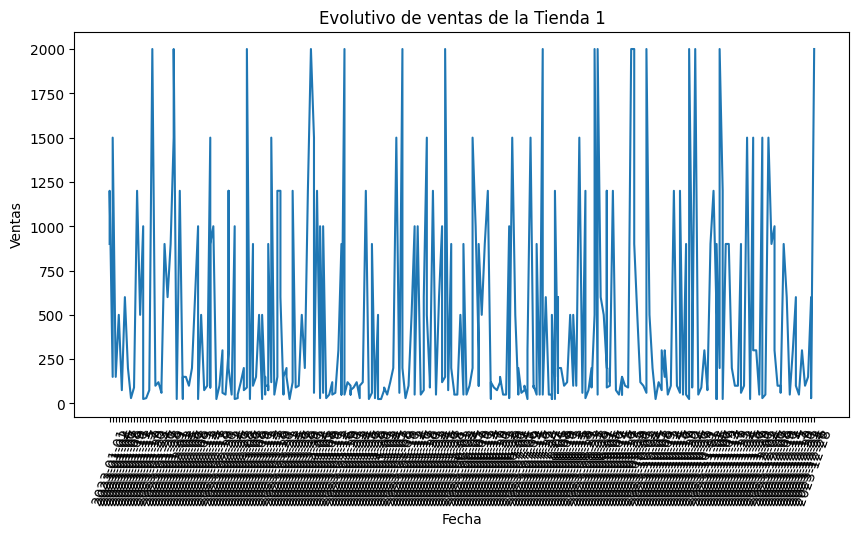

In [142]:
plt.figure(figsize = (10, 5))
#plt.bar(df_T_1_desordenado['Tienda'],df_T_1_desordenado['Sales'], width=0.5, label="Tienda vs Ventas")
plt.title('Evolutivo de ventas de la Tienda 1')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.plot(df_T_1_desordenado['Date'], df_T_1_desordenado['Sales'])
plt.xticks(rotation = 70)
plt.show()
#plt.xticks(range(0, 6*12, 3), rotation = 70)

Este grafico intenta mostrar la evolucion de ventas de la tienda 1, sin embargo el eje x las fechas estan por dia o que hace que el grafico se vea mal

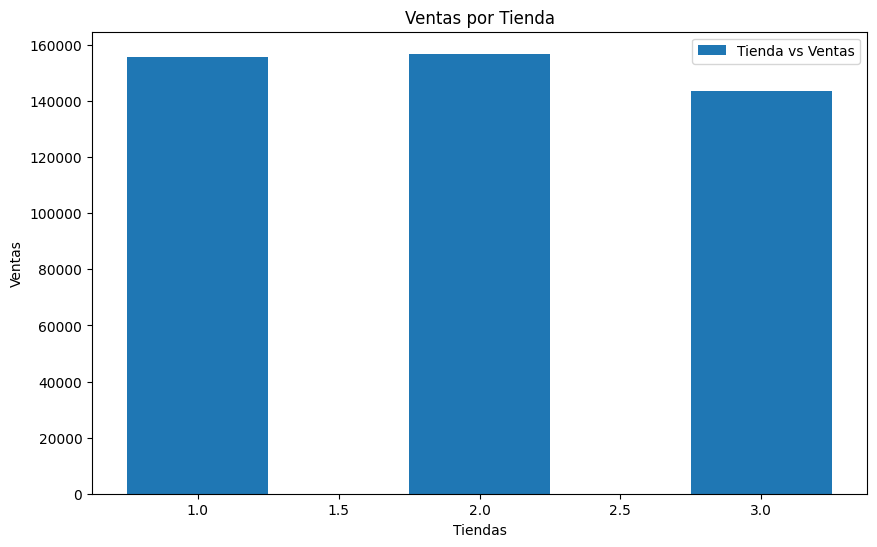

In [103]:
plt.figure(figsize=(10, 6))
plt.bar(df_2['Tienda'],df_2['Sales'], width=0.5, label="Tienda vs Ventas")
plt.annotate('Este valor es particularmente extraño', xy=(80,9), xytext=(55,14), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("Tiendas")
plt.ylabel("Ventas")
plt.title("Ventas por Tienda")
plt.legend()
plt.show()

En este grafico se muestran las ventas por cada tienda, podmeos ver que la tienda 1 y 2 tienen ventas cercanas a las 160 mil, mientras la tienda 3 tiene ventas cercanas a los 140 mil

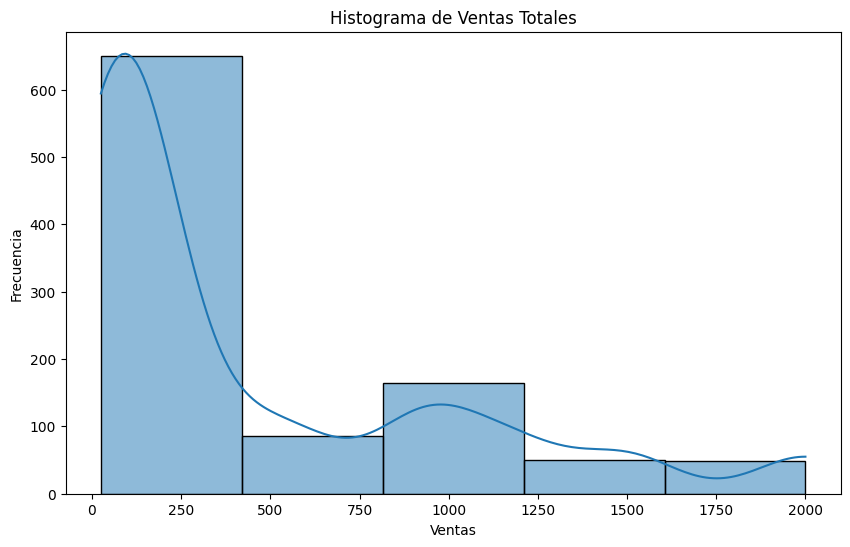

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'],bins= 5, kde=True)
plt.title("Histograma de Ventas Totales")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

En el Histograma de ventas de los 3 tipos de tiendas podemos ver que las ventas de poco valor son las que mas se realizan,teniendo el pico por sobre las 650 unidades vendidas en productos con valores no superiores a los 450 aprox, sin embargo el grafico muestra que la curva de ventas baja significativamente hacia las ventas mas altas, llegando a vender alrededor de 150 unidades por un valor cercano a los 1000, lo que es muy bajo para la tienda de retail

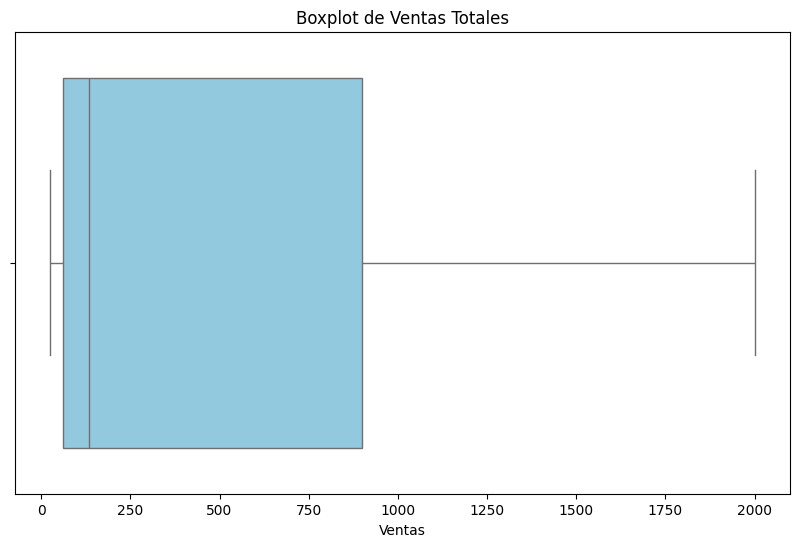

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales', data=df, color='skyblue')
plt.title("Boxplot de Ventas Totales")
plt.xlabel("Ventas")
plt.show()

El boxplot de ventas totales corrobora lo analizado en el Histograma de ventas totales, se puede apreciar que los bigotes del boxplot se encuentran entre 0 y 2000 lo que siguiere que algunas tiendas no venden nada y otras venden 2000 (muy pocas tiendas venden esa cantidad) el boxplot no muestra valores atipicos o outlier fuera de sus bigotes.

 Como muestra la caja, el rango de ventas de las 3 tiendas esta entre los 50 y los 900, sin embargo la media se encuentra alrededor de los 150 con una inclinacion bien definida hacia la derecha, lo que indica que hay un numero impoortante de tiendas que ganan entre los 150 y los 900.

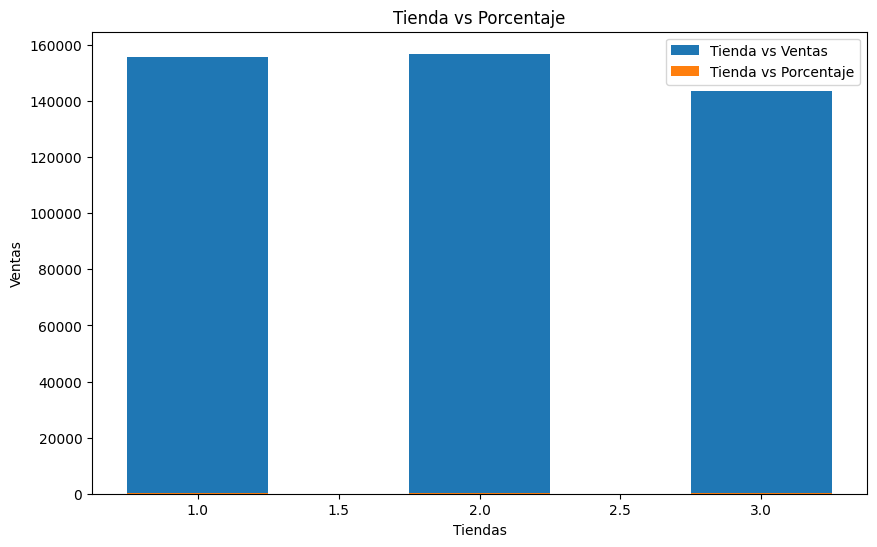

In [144]:
plt.figure(figsize=(10, 6))
plt.bar(df_2['Tienda'],df_2['Sales'], width=0.5, label="Tienda vs Ventas")
plt.bar(df_2['Tienda'],df_2['Porcentaje'], width=0.5, label="Tienda vs Porcentaje")
plt.xlabel("Tiendas")
plt.ylabel("Ventas")
plt.title("Tienda vs Porcentaje")
plt.legend()
plt.show()

Este grafico intento mostrar la relacion de las ventas con sus porcentajes, pero no se logra ver los porcentajes, serguramente falto realziar un filtro para que los porcentajes se pudieran ver

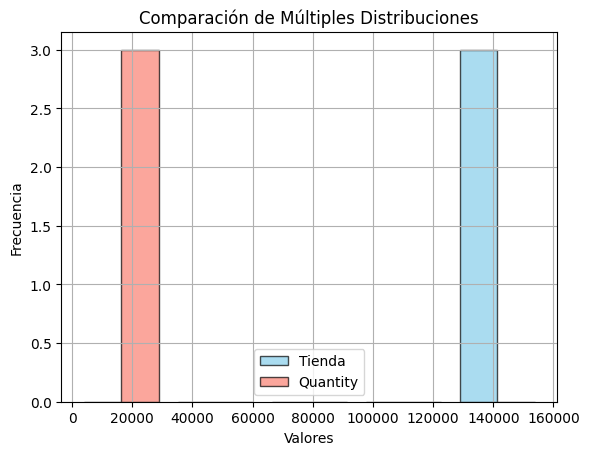

In [145]:
plt.hist([df_2['Sales'], df_2['Quantity']], bins=5, color=['skyblue', 'salmon'], edgecolor='black', alpha=0.7, label=['Tienda', 'Quantity'])
plt.title("Comparación de Múltiples Distribuciones")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.show()

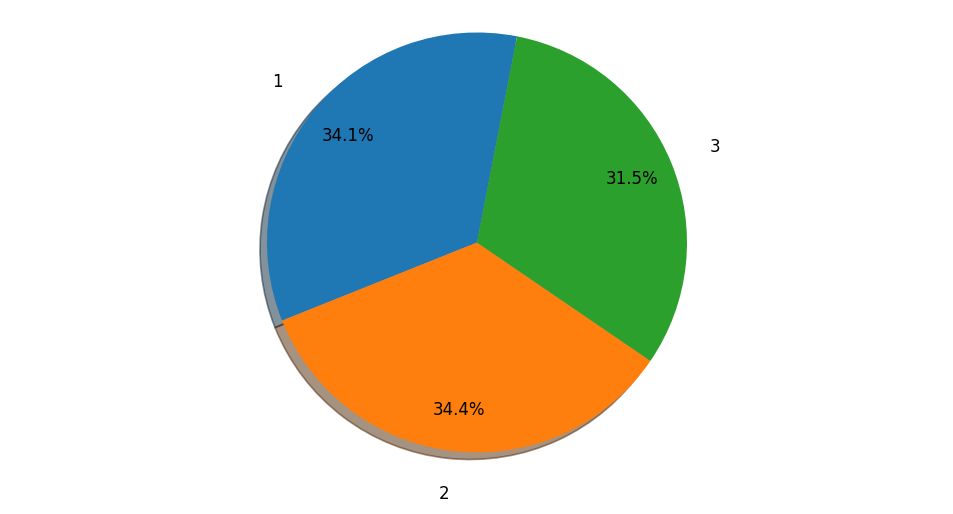

In [152]:
fig1 = plt.figure(dpi = 120,figsize=(10,5))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.pie(df_2['Sales'],labels=df_2['Tienda'],autopct='%1.1f%%',shadow = True,startangle=79, pctdistance=0.8,labeldistance=1.2)
ax1.axis('equal')
plt.show()

El grafico de torta muestra el porcentaje de ventas de las tiendas 1,2 y 3. Donde la tienda 2 tiene el mayor porcentaje de ventas